In [13]:
import sys
import os
import glob
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from scipy.stats import norm, skew, kurtosis
import matplotlib.mlab as mlab
plt.style.use('JFM')

import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.hh_decomp import window_tukey, window_field
from scripts.common import *

def get_data(f):
    dat = np.fromfile(f,sep=' ')
    n = np.size(dat)
    dat = np.reshape(dat,[int(n/6.),6])
    ubar = dat[:,0]
    vbar = dat[:,1]
    utilde = dat[:,2]
    vtilde = dat[:,3]
    ru = dat[:,4]
    rv = dat[:,5]
    return ubar,vbar,utilde,vtilde,ru,rv

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/512x724x256/'
directory = '/home/kmatsuno/ShearLayerData/production/Mc02/rr7/1024x1448x512/'
inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(Ly/2.,-Ly/2.,Ny)

flist = glob.glob(directory+"massflux*dat")
flist.sort()
print([f.split('/')[-1] for f in flist])

tlist,dlist,rates = growth_rates(directory+'shearlayer_')

Params for this run:
	Mc = 0.2
	Re = 1000.0
	rr = 7.0
Params for this grid:
	N = 1024x1448x512
	L = 150.0x200.0x75.0
['massflux_0071.dat', 'massflux_0072.dat', 'massflux_0073.dat', 'massflux_0074.dat', 'massflux_0075.dat', 'massflux_0076.dat', 'massflux_0077.dat']


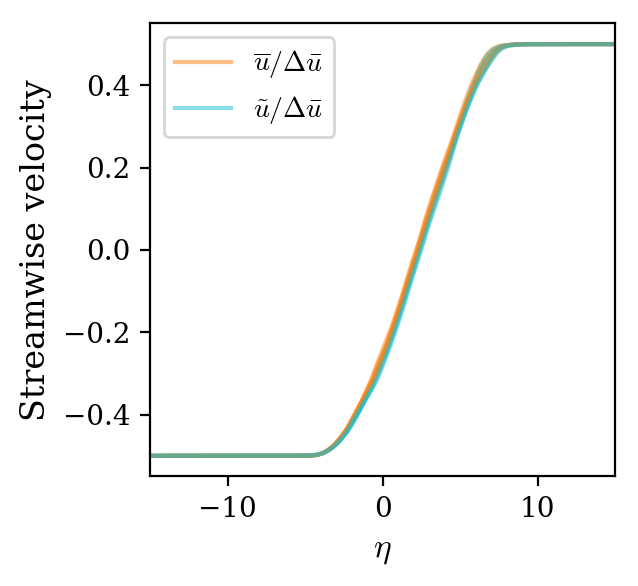

In [12]:
# need Mc08_rr_7: massflux(utilde, vtilde) and Rij kinematic

fig = plt.figure(figsize=(3,3),dpi=200)

directory = '/home/kmatsuno/ShearLayerData/production/Mc08/rr_7/1024x1448x512/'
filename_prefix = directory + '/shearlayer_'
inp = nml.inputs(directory)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=False)
Ny = int(Ny)
y = np.linspace(-Ly/2.,Ly/2.,Ny)

flist = glob.glob(directory+"massflux*")
flist.sort()

ist=5;ien = -1
        
for j,fname in enumerate(flist[ist:ien]):
    tID = fname.split('/')[-1]
    tID = tID.split('_')[-1]
    tID = int(tID.split('.')[0])
    time = nml.read_time(directory,tID)

    # Get dtheta
    dtheta = get_dtheta(directory,time)
    eta = y/dtheta

    ubar,vbar,utilde,vtilde,ru,rv = get_data(fname)
    if j==0: 
        label1=r'$\overline{u}/\Delta\bar{u}$'
        label2=r'$\tilde{u}/\Delta\bar{u}$'
    else: label1,label2=None,None
    plt.plot(eta,ubar/inp.du,color='C1',alpha=0.5,label=label1)
    plt.plot(eta,utilde/inp.du,color='C9',alpha=0.5,label=label2)

plt.xlim([-15,15])
plt.xlabel(r'$\eta$')
plt.ylabel('Streamwise velocity')
plt.legend(fontsize=10)
# plt.grid(True)
